In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
from scipy.stats import norm, expon

In [2]:
a = 4.5

In [3]:
N = 500

## 被積分関数

In [4]:
f = norm.pdf
h = lambda x: x > a
y = lambda x: h(x) * f(x)

## scipy.integrateでの積分

In [5]:
I = scipy.integrate.quad(y, -np.inf, np.inf)[0]
print("scipy.integrate:", I)

scipy.integrate: 3.3971490229267047e-06


## 通常のモンテカルロ積分の場合

In [6]:
x = norm.rvs(size=N)
I = np.mean(h(x))
print("normal monte carlo integration:",I)

normal monte carlo integration: 0.0


## 重点関数として平均が4.5の正規分布を使用した重点サンプリング

In [7]:
g1 = norm(loc=a, scale=1).pdf
x1 = norm(loc=a, scale=1).rvs(size=N)
I = np.mean(f(x1) / g1(x1) * h(x1))
print("importance sampling(norm):", I)

importance sampling(norm): 3.52141912289e-06


## 重点関数として、4.5での指数分布を使用した重点サンプリング

In [8]:
def g2(xlist, a):
    result = []
    for x in xlist:
        if x < a: result.append(0)
        else: result.append(np.exp(-(x - a)))
    return result

In [9]:
x2 = expon(loc=0, scale=1).rvs(size=N) + a
I = np.mean(f(x2) / g2(x2, a) * h(x2))
print("importance sampling(truncated expon);", I)

importance sampling(truncated expon); 3.63582114018e-06


## グラフ描画

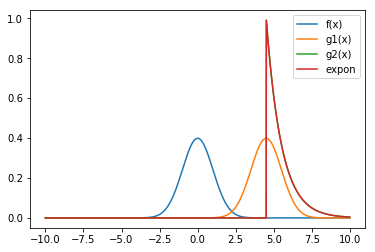

In [10]:
ix = np.arange(-10, 10, 0.01)
plt.plot(ix, f(ix), label='f(x)')
plt.plot(ix, g1(ix), label='g1(x)')
plt.plot(ix, g2(ix, a), label='g2(x)')
plt.plot(ix, expon(loc=a).pdf(ix), label='expon')
plt.legend(loc='best')
plt.show()

## 収束性の評価

In [14]:
plt.subplot(211)
x1 = f(x1) / g1(x1) * h(x1)
estint = np.cumsum(x1) / np.arange(1, N + 1)
esterr = np.sqrt(np.cumsum((x1 - estint) ** 2)) / np.arange(1, N + 1)
plt.plot(estint, color='red', linewidth=2)
plt.plot(estint + 2 * esterr, color='gray')
plt.plot(estint - 2 * esterr, color='gray')
plt.title('convergence ( g = norm)')
plt.ylim([0, 8e-6])

(0, 8e-06)

In [15]:
plt.subplot(212)
x2 = f(x2) / g2(x2, a) * h(x2)
estint = np.cumsum(x2) / np.arange(1, N + 1)
esterr = np.sqrt(np.cumsum((x2 - estint) ** 2)) / np.arange(1, N + 1)
plt.plot(estint, color='red', linewidth=2)
plt.plot(estint + 2 * esterr, color='gray')
plt.plot(estint - 2 * esterr, color='gray')
plt.title('convergence( g= truncated expon)')
plt.ylim([0, 8e-6])

/Users/hiroki/.pyenv/versions/anaconda3-4.0.0/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/hiroki/.pyenv/versions/anaconda3-4.0.0/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


(0, 8e-06)

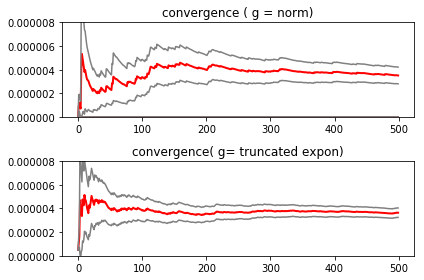

In [16]:
plt.tight_layout()
plt.show()